In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Numerical methods for ordinary differential equations

## Problem

$y'(t)=f(t,y(t))$

with initial condition: $y(t_0) = y_0$

## Forward Euler method (explicit)

$y(t_i + h) = y(t_i) + h \cdot f(t_i, y(t_i))$

In [2]:
def forward_euler_explicit(f, t_0, t_max, n, y_0):
    
    def next_step(f, t, y, h): 
        return y + h*f(t,y)
        
    t = np.linspace(t_0, t_max, n)
    h = (t_max - t_0)/(n-1)
    
    y = np.zeros((n, len(y_0)))
    y[0, :] = y_0
    
    for i in range(1,n):
        y[i, :] = next_step(f, t[i-1], y[i-1], h)
    return t,y

## Backward Euler method (implicit)

$y(t_i + h) = y(t_i) + h \cdot f(t_i, y(t_i+h))$

In [3]:
def backward_euler_implicit(f, t_0, t_max, n, y_0):
    
    residual = lambda new_y, f, y, h, new_t: new_y - y - h*f(new_t, new_y)
    
    def next_step(f, t, y, h, new_t):
        new_y = y + h*f(t,y)  # guess = euler explicit
        return fsolve(residual, new_y, args=(f,y,h,new_t))
        
    t = np.linspace(t_0, t_max, n)
    h = (t_max - t_0)/(n-1)
    
    y = np.zeros((n, len(y_0)))
    y[0, :] = y_0
    
    for i in range(1,n):
        y[i, :] = next_step(f, t[i-1], y[i-1], h, t[i])
    return t,y

## Runge-Kutta method (RK4) (explicit)

$k_1 = f(t_i, y(t_i))$
<br/>
$k_2 = f(t_i + \frac{1}{2}h, y(t_i) + \frac{1}{2}h\cdot k_1)$
<br/>
$k_3 = f(t_i + \frac{1}{2}h, y(t_i) + \frac{1}{2}h\cdot k_2)$
<br/>
$k_4 = f(t_i + h, y(t_i) + h \cdot k_3)$
<br/>
$y(t_i + h) = y(t_i) + \frac{1}{6}h \cdot (k_1 + 2 k_2 + 2 k_3 + k_4)$

In [4]:
def runge_kutta_4_explicit(f, t_0, t_max, n, y_0):
    
    def next_step(f, t, y, h): 
        k_1 = f(t      ,y)
        k_2 = f(t + h/2,y + h/2*k_1)
        k_3 = f(t + h/2,y + h/2*k_2)
        k_4 = f(t + h  ,y + h*k_3)
        return y + h/6*(k_1 + 2*k_2 + 2*k_3 + k_4)
        
    t = np.linspace(t_0, t_max, n)
    h = (t_max - t_0)/(n-1)
    
    y = np.zeros((n, len(y_0)))
    y[0, :] = y_0
    
    for i in range(1,n):
        y[i, :] = next_step(f, t[i-1], y[i-1], h)
    return t,y

## Heun method (explicit)

$k_1 = f(t_i, y(t_i))$
<br/>
$k_2 = f(t_i + h, y(t_i) + h\cdot k_1)$
<br/>
$y(t_i + h) = y(t_i) + \frac{1}{2}h \cdot (k_1 + k_2)$

In [5]:
def heun_explicit(f, t_0, t_max, n, y_0):
    
    def next_step(f, t, y, h): 
        k_1 = f(t    ,y)
        k_2 = f(t + h,y + h*k_1)
        return y + h/2*(k_1 + k_2)
        
    t = np.linspace(t_0, t_max, n)
    h = (t_max - t_0)/(n-1)
    
    y = np.zeros((n, len(y_0)))
    y[0, :] = y_0
    
    for i in range(1,n):
        y[i, :] = next_step(f, t[i-1], y[i-1], h)
    return t,y

## Example 1

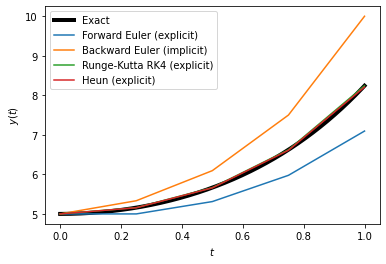

In [6]:
f = lambda t,y: t*y
y0 = [5]
t_0 = 0
t_max = 1
n = 5

y_exact = lambda t: np.exp(1/2*t**2)*y0

t = np.linspace(t_0,t_max,n*100)
plt.plot(t,y_exact(t), label="Exact", c="black", lw=4)


plt.plot(*forward_euler_explicit(f, t_0, t_max, n, y0), label="Forward Euler (explicit)")
plt.plot(*backward_euler_implicit(f, t_0, t_max, n, y0), label="Backward Euler (implicit)")
plt.plot(*runge_kutta_4_explicit(f, t_0, t_max, n, y0), label="Runge-Kutta RK4 (explicit)")
plt.plot(*heun_explicit(f, t_0, t_max, n, y0), label="Heun (explicit)")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.show()

## Example 2

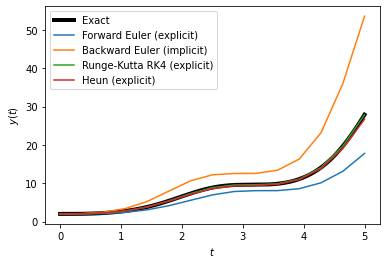

In [7]:
f = lambda t,y: np.sin(t)**2*y
y0 = [2]
t_0 = 0
t_max = 5
n = 15

y_exact = lambda t: np.exp(-1/4*(np.sin(2*t)-2*t))*y0

t = np.linspace(t_0,t_max,n*100)
plt.plot(t,y_exact(t), label="Exact", c="black", lw=4)


plt.plot(*forward_euler_explicit(f, t_0, t_max, n, y0), label="Forward Euler (explicit)")
plt.plot(*backward_euler_implicit(f, t_0, t_max, n, y0), label="Backward Euler (implicit)")
plt.plot(*runge_kutta_4_explicit(f, t_0, t_max, n, y0), label="Runge-Kutta RK4 (explicit)")
plt.plot(*heun_explicit(f, t_0, t_max, n, y0), label="Heun (explicit)")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.show()